In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlb-player-digital-engagement-forecasting/players.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/example_sample_submission.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/teams.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/seasons.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/example_test.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/train_updated.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/train.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/awards.csv
/kaggle/input/mlb-player-digital-engagement-forecasting/mlb/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/mlb-player-digital-engagement-forecasting/mlb/__init__.py
/kaggle/input/project-files/STANDINGS.PKL
/kaggle/input/project-files/HOMERUNS.PKL
/kaggle/input/project-files/OFFENSE.PKL
/kaggle/input/project-files/awards.csv
/kaggle/input/project-files/target_df.PKL


In [46]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import re
import csv
from datetime import datetime
import os
import time
import dask
import json
import pickle

In [47]:
#importing pickle dataframes
with open ('HOMERUNS.PKL', 'rb') as f:
    homeruns_df= pickle.load(f)

In [48]:
with open ('OFFENSE.PKL', 'rb') as f:
    offense_df= pickle.load(f)

In [49]:
with open ('STANDINGS.PKL', 'rb') as f:
    standings_df=pickle.load(f)

In [50]:

with open ('target_df.PKL', 'rb') as f:
    target_df=pickle.load(f)

## Data Cleaning and Preparing data for Tensorflow NN

In [51]:
#taking only the first 7 digits of the target column
target_df.target1= target_df.target1.map(lambda x: x[0:6])
target_df.target2= target_df.target2.map(lambda x: x[0:6])
target_df.target3= target_df.target3.map(lambda x: x[0:6])
target_df.target4= target_df.target4.map(lambda x: x[0:6])

In [52]:
df=pd.read_csv('players.csv')

In [53]:
df3=pd.read_csv('awards.csv')

In [54]:
#creating a dictionary for player Id: playername
a=list(df.playerId)

In [55]:
b=list(df.playerName)

In [56]:
#dictionary created
dictionary = dict(zip(a,b))

In [57]:
dictionary1=dict(zip(b,a))

In [58]:
#data cleaning the date 
target_df = target_df.rename(columns = {'engagementMetricsDate': 'gameDate'}, inplace = False)

In [59]:

df3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [60]:
#joining award with target df
work= pd.merge(target_df, df3, how='outer', on= ['playerId'])

In [61]:
offense_df.rename(columns={'playerName': 'playerId'}, inplace=True)
offense_df.drop(['teamName'], axis=1, inplace=True)

In [62]:
work.gameDate.replace('engagementMetricsDate', np.nan).dropna(axis=0, inplace=True)

In [63]:
work.dropna(axis=0, inplace=True)

In [64]:

work2= pd.merge(work, offense_df, how='outer', on= ['playerId'])
work3=work2[:5737823]

In [65]:

work2.rename(columns={'gameDate_x': 'gameDate'}, inplace=True)

In [66]:
work2.drop(['gameDate_y'], axis=1, inplace=True)

In [67]:
work2.playerId.dropna(axis=0, inplace=True)

In [68]:
work2.gameDate.replace('engagementMetricsDate', np.nan, inplace=True)

In [69]:
work2.target1.dropna(axis=0, inplace=True)

In [70]:
work2.drop(['awardId', 'awardPlayerTeamId'], axis=1, inplace=True)

In [71]:
work2.gameDate.dropna(axis=0, inplace=True)

In [72]:
work2.target1.dropna(axis=0, inplace=True)

In [73]:
work2.drop(['awardSeason'], axis=1, inplace=True)

In [80]:
work2.gameDate=[str(x).replace('-', '') for x in work2.gameDate]

In [76]:
work2.gameDate[:5737823]=[int(x) for x in work2.gameDate[:5737823]]

In [77]:
work2.awardDate=[str(x).replace('-', '') for x in work2.awardDate]

In [78]:
work2.awardDate.replace('awardDate', np.nan, inplace=True)

In [79]:
work2.drop('playerId', axis=1, inplace=True)

In [81]:
work2.atBats.replace('atBats', np.nan, inplace=True)

In [82]:
work2.atBats=[float(x) for x in work2.atBats]

In [83]:
work2.rbi.replace('rbi', np.nan, inplace=True)
work2.rbi=[float(x) for x in work2.rbi]

In [84]:
work2.homeRuns.replace('homeRuns', np.nan, inplace=True)
work2.homeRuns=[float(x) for x in work2.homeRuns]

In [85]:
work2.replace('target', np.nan, inplace=True)
work2.target1=[float(x) for x in work2.target1]
work2.target2=[float(x) for x in work2.target2]
work2.target3=[float(x) for x in work2.target3]
work2.target4=[float(x) for x in work2.target4]

In [86]:
work2.target4[:5737823].isna().sum()

0

### The following code in cells is to transform the date_playerId column which is a specific format for this competition 

In [87]:
work2.playerName.replace(dictionary1, inplace=True)

In [88]:
work2.playerName.replace('playerName', np.nan, inplace=True)

In [89]:
work2.playerName.dropna(axis=0, inplace=True)

In [90]:
a=work2.playerName[:5737823].replace('Jimmie Sherfy', 000000)
b=work2.gameDate[:5737823]

In [91]:
b.isna().sum()

0

In [92]:
a.value_counts()

624413    45342
605141    41220
592885    39159
665489    39159
673357    35037
          ...  
669720     2061
608335     2061
571503     2061
645307     2061
0          2061
Name: playerName, Length: 973, dtype: int64

In [93]:
player=list(a)
date=list(b)

In [103]:
date_playerId=list(zip(date,player))

In [104]:
pd.Series(date_playerId).value_counts()

(20210501, 624413)    18612
(20210501, 605141)    16920
(20210501, 592885)    16074
(20210501, 665489)    16074
(20210501, 666158)    14382
                      ...  
(20190520, 676801)        1
(20190120, 600301)        1
(20190807, 680702)        1
(20201008, 600869)        1
(20181110, 642545)        1
Length: 1183168, dtype: int64

In [105]:

joined_string=[str(x) for x in date_playerId]

In [106]:
joiner=[str(x) for x in joined_string]

In [107]:


date_playerId=[]
for i in range(len(joiner)):
    date_playerId.append(joiner[i].replace('.0, ', '_'))



In [108]:
stuff= [date_playerId[i].replace('(', '').replace(')', '').replace(', ', '_') for i in range(len(date_playerId))]

In [118]:
stuff=[x.replace("'", "") for x in stuff]

In [120]:
work2.playerName=pd.Series(stuff)

In [121]:
#the playerName column is the date_playerId column that needed to be processed
work2.playerName=[float(x) for x in work2.playerName]
work2

,gameDate,target1,target2,target3,target4,awardName,awardDate,playerName,atBats,rbi,homeRuns
0,20180102,0.0111,4.4747,0.0051,5.7352,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
1,20180103,0.0063,2.5210,0.0016,2.7669,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
2,20180104,0.0035,2.3809,0.0036,3.4393,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
3,20180105,0.0033,3.3323,0.0122,4.8496,All-MLB Second Team,20201209,2.018011e+13,NaN,NaN,NaN
4,20180106,0.0239,1.4407,0.0015,2.3712,All-MLB Second Team,20201209,2.018011e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6495689,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,0.0,0.0,0.0
6495690,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,1.0,0.0,0.0
6495691,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,0.0,0.0,0.0
6495692,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,3.0,1.0,0.0


[]

1.928090113377032

## Getting data for TTS

In [68]:
from sklearn.model_selection import train_test_split
X= work2[:5737823].drop(columns=['target1', 'target2', 'target3', 'target4'], axis=1)

y= work2[:5737823].target1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [69]:
work2

,gameDate,target1,target2,target3,target4,awardName,awardDate,playerName,atBats,rbi,homeRuns
0,20180102,0.0111,4.4747,0.0051,5.7352,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
1,20180103,0.0063,2.5210,0.0016,2.7669,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
2,20180104,0.0035,2.3809,0.0036,3.4393,All-MLB Second Team,20201209,2.018010e+13,NaN,NaN,NaN
3,20180105,0.0033,3.3323,0.0122,4.8496,All-MLB Second Team,20201209,2.018011e+13,NaN,NaN,NaN
4,20180106,0.0239,1.4407,0.0015,2.3712,All-MLB Second Team,20201209,2.018011e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6495689,nan,1.9281,NaN,NaN,NaN,NaN,nan,NaN,0.0,0.0,0.0
6495690,nan,1.9281,NaN,NaN,NaN,NaN,nan,NaN,1.0,0.0,0.0
6495691,nan,1.9281,NaN,NaN,NaN,NaN,nan,NaN,0.0,0.0,0.0
6495692,nan,1.9281,NaN,NaN,NaN,NaN,nan,NaN,3.0,1.0,0.0


In [127]:
# formatting the awardName column to a float for tensorflow. One hot encoder is needed to get the award names and enumerated to form a basic
# dictionary that can replace the column values
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error',drop='first')

In [143]:
work2=work2.loc[:5737823]

In [133]:
mat_awards=enc.fit(work2[['awardName']])
dictionary_e=enc.get_feature_names()

In [134]:
obj_d=enumerate(dictionary_e)
create=list(obj_d)

In [135]:
list1=[]
list2=[]
for i in range(len(create)):
    list2.append(create[0:][i][0]) 
for i in range(len(create)):   
    list1.append(create[0:][i][1])

In [136]:
len(list1)

287

In [137]:
list1=[str(x) for x in list1]
list1=[list1[i].replace('x0_','') for i in range(len(list2))]

In [138]:
list2=[int(x) for x in list2]

In [139]:
res = dict(zip(list1, list2))

In [140]:
#result dictionary
res

{'AFL Dernell Stenson Sportsmanship Award': 0,
 'AFL Hall of Fame Member': 1,
 'AFL Most Valuable Player': 2,
 'AFL Pitcher of the Week': 3,
 'AFL Player of the Week': 4,
 'AFL Rising Stars': 5,
 'AL All-Star': 6,
 'AL Comeback Player of the Year': 7,
 'AL Cy Young': 8,
 'AL Hank Aaron Award': 9,
 'AL MVP': 10,
 'AL Pitcher of the Month': 11,
 'AL Player of the Month': 12,
 'AL Player of the Week': 13,
 'AL Reliever of the Month': 14,
 'AL Rookie of the Month': 15,
 'AL Rookie of the Year': 16,
 'AL Silver Slugger': 17,
 'ALCS MVP': 18,
 'APP Player of the Week': 19,
 'APP Post-Season All-Star': 20,
 'AZL Post-Season All-Star': 21,
 'All-MLB First Team': 22,
 'All-MLB Second Team': 23,
 'All-Star MVP': 24,
 'Astros Darryl Kile Award': 25,
 'Astros Most Valuable Player': 26,
 'Astros Pitcher of the Year': 27,
 'Astros Rookie of the Year': 28,
 'Athletics Dave Stewart Service Award': 29,
 'Athletics Jim Catfish Hunter Award': 30,
 'Babe Ruth Award': 31,
 'Baseball America Double-A All-St

In [144]:
work2.awardName.replace(res, inplace=True)


In [145]:
work2.awardName.replace('AFL All-Prospect Team', 287, inplace=True)

In [146]:
work2.awardName.value_counts()


179    692495
93     162819
285    160758
6      156636
188    148392
        ...  
99       2061
40       2061
78       2061
103      2061
63       2061
Name: awardName, Length: 288, dtype: int64

In [178]:
# converted all the nan values into 0.0 which can than utilize the masking method in tf to input sequences 
work2.replace(np.nan, 0.0, inplace=True)

In [149]:
#first scale data
from sklearn.preprocessing import MinMaxScaler

In [150]:
scaler=MinMaxScaler()

In [214]:
# This data is the features in the model
X=work2.drop(['target1', 'target2', 'target3', 'target4'], inplace=False, axis=1)

In [215]:
# Leaving room for a holdout set
X=X.loc[:5000000]

In [216]:
# Final dtype conversion to prepare for tf 
X = np.asarray(X).astype('float32')

In [217]:
X

array([[2.0180102e+07, 2.3000000e+01, 2.0201208e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0180104e+07, 2.3000000e+01, 2.0201208e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0180104e+07, 2.3000000e+01, 2.0201208e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0191124e+07, 2.1000000e+02, 2.0180804e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0191124e+07, 2.1000000e+02, 2.0190616e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0191124e+07, 1.9500000e+02, 2.0200912e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [219]:
# TTS
from sklearn.model_selection import train_test_split
X=X
y= work2.loc[:5000000].target1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [220]:
# Using the MinMax Scaler defined above
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[1.        , 0.6236934 , 0.36090088, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.6236934 , 0.36090088, ..., 0.        , 0.        ,
        0.        ],
       [0.02703857, 0.38327527, 0.34417725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03717041, 0.20905924, 0.01324463, ..., 0.        , 0.        ,
        0.        ],
       [0.34906006, 0.8815331 , 0.34094238, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33101046, 0.01641846, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [243]:
# Reshaping the sequences to match the shape required for LSTM
X_train=X_train.reshape(-1, 7,1)

In [239]:
X_train.shape[1]

7

In [167]:
# Importing tf and Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from tensorflow.keras import layers

## Target 1 Predict

In [262]:
#building the neural net
model=Sequential()
model.add(tf.keras.layers.Masking(mask_value=0.0, input_shape=(X_train.shape[1], 1)))

model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1 )))
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(35))
model.add(Dense(1))

In [266]:
#Adadelta optimizer
optimizer=tf.keras.optimizers.Adadelta(
    learning_rate=0.08,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adadelta")

In [398]:
# Adam optimizer
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.08,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam")

In [297]:
# SGD optimizer
optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.1, nesterov=True, name="SGD")


In [399]:
#Compile the model

model.compile(optimizer=optimizer, loss='mean_absolute_error')
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

In [400]:
history=model.fit(X_train, y_train, batch_size=50000, epochs=12, callbacks=my_callbacks, validation_data=(X_test, y_test), workers=-1 )

Epoch 1/12
67/67 [==============================] - 451s 7s/step - loss: 3.4069 - val_loss: 3.2988
Epoch 2/12
67/67 [==============================] - 450s 7s/step - loss: 3.2937 - val_loss: 3.2984
Epoch 3/12
67/67 [==============================] - 430s 6s/step - loss: 3.2942 - val_loss: 3.2984
Epoch 4/12
67/67 [==============================] - 418s 6s/step - loss: 3.3014 - val_loss: 3.2984


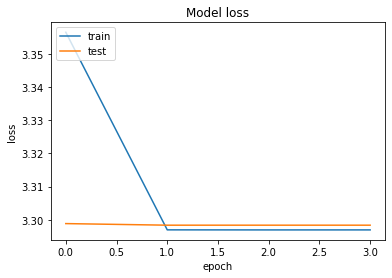

In [405]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [401]:
y_pred=model.predict(X_test)


In [277]:
valid_set=work2.drop(['target1', 'target2', 'target3', 'target4'], inplace=False, axis=1)

In [290]:
scaler.fit_transform(valid_set[5000000:])

array([[0.36257772, 0.67944251, 0.68498229, ..., 0.        , 0.        ,
        0.        ],
       [0.36261061, 0.73170732, 0.01939691, ..., 0.        , 0.        ,
        0.        ],
       [0.36261061, 0.73170732, 0.34414617, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.62369338, 0.02601701, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.28222997, 0.01019496, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.11149826, 0.02300487, ..., 0.        , 0.        ,
        0.        ]])

In [293]:
valid_set=np.array(valid_set).astype('float32')


In [294]:
y_pred_valid=model.predict(valid_set[5000000: ])

In [296]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
validation_mae= mean_absolute_error(y_pred_valid, work2.target1.loc[5000000:])
print(rmse)
print(mae)
print(validation_mae)
print(work2.target1.mean())

7.919221562616218
2.0579791917942587
0.9872321037700794
1.928089151355393


NameError: name 'history' is not defined

## Target 2 Predict

In [301]:
model2=Sequential()
model2.add(tf.keras.layers.Masking(mask_value=0.0, input_shape=(X_train.shape[1], 1)))

model2.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1 )))
model2.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(100, return_sequences=False))
model2.add(Dense(35))
model2.add(Dense(1))

In [306]:
#Compile the model

model2.compile(optimizer=optimizer, loss='mean_absolute_error')
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

In [307]:

X=X
y= work2.loc[:5000000].target2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [308]:
history2=model2.fit(X_train, y_train, batch_size=50000, epochs=12, callbacks=my_callbacks, validation_data=(X_test, y_test), workers=-1 )

Epoch 1/12
67/67 [==============================] - 440s 6s/step - loss: 8.9146 - val_loss: 4.4897
Epoch 2/12
67/67 [==============================] - 427s 6s/step - loss: 4.4899 - val_loss: 4.4810
Epoch 3/12
67/67 [==============================] - 427s 6s/step - loss: 4.4837 - val_loss: 4.4810
Epoch 4/12
67/67 [==============================] - 435s 7s/step - loss: 4.4838 - val_loss: 4.4809
Epoch 5/12
67/67 [==============================] - 432s 6s/step - loss: 4.4907 - val_loss: 4.4809
Epoch 6/12
67/67 [==============================] - 428s 6s/step - loss: 4.4817 - val_loss: 4.4809


In [309]:
y_pred2=model2.predict(X_test)

In [310]:
y_pred_valid2=model2.predict(valid_set[5000000: ])

In [311]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred2, y_test)
rmse = mean_squared_error(y_pred2, y_test, squared=False)
validation_mae= mean_absolute_error(y_pred_valid2, work2.target2.loc[5000000:])
print(rmse)
print(mae)
print('Validation MAE: ', validation_mae)
print(work2.target2.mean())

10.465934415700639
4.4809030705804345
Validation MAE:  3.3801183590918202
4.576754679555599


## Target 3 Predict

In [316]:
# Adam optimizer
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.12,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam")


model3=Sequential()
model3.add(tf.keras.layers.Masking(mask_value=0.0, input_shape=(X_train.shape[1], 1)))

model3.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1 )))
model3.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model3.add(LSTM(100, return_sequences=False))
model3.add(Dense(35))
model3.add(Dense(1))

In [317]:
#Compile the model

model3.compile(optimizer=optimizer, loss='mean_absolute_error')
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

In [318]:

X=X
y= work2.loc[:5000000].target3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [319]:
history3= model3.fit(X_train, y_train, batch_size=50000, epochs=12, callbacks=my_callbacks, validation_data=(X_test, y_test), workers=-1 )

Epoch 1/12
67/67 [==============================] - 441s 6s/step - loss: 5.6059 - val_loss: 1.6503
Epoch 2/12
67/67 [==============================] - 427s 6s/step - loss: 1.5824 - val_loss: 1.5584
Epoch 3/12
67/67 [==============================] - 425s 6s/step - loss: 1.5628 - val_loss: 1.5582
Epoch 4/12
67/67 [==============================] - 425s 6s/step - loss: 1.5506 - val_loss: 1.5582
Epoch 5/12
67/67 [==============================] - 426s 6s/step - loss: 1.5482 - val_loss: 1.5582
Epoch 6/12
67/67 [==============================] - 426s 6s/step - loss: 1.5543 - val_loss: 1.5582
Epoch 7/12
67/67 [==============================] - 425s 6s/step - loss: 1.5613 - val_loss: 1.5582


In [320]:
y_pred3=model3.predict(X_test)

In [321]:
y_pred_valid3=model3.predict(valid_set[5000000: ])

In [322]:

mae = mean_absolute_error(y_pred3, y_test)
rmse = mean_squared_error(y_pred3, y_test, squared=False)
validation_mae= mean_absolute_error(y_pred_valid3, work2.target3.loc[5000000:])
print(rmse)
print(mae)
print('Validation MAE: ', validation_mae)
print(work2.target3.mean())

7.79654390287602
1.558158709866656
Validation MAE:  1.03894356210404
1.49127426435589


## Target 4 Prediction

In [327]:
# Adam optimizer
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.15,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam")


model4=Sequential()
model4.add(tf.keras.layers.Masking(mask_value=0.0, input_shape=(X_train.shape[1], 1)))

model4.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1 )))
model4.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model4.add(LSTM(100, return_sequences=False))
model4.add(Dense(35))
model4.add(Dense(1))

In [328]:
#Compile the model

model4.compile(optimizer=optimizer, loss='mean_absolute_error')
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

In [329]:
X=X
y= work2.loc[:5000000].target4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [330]:
history4= model4.fit(X_train, y_train, batch_size=50000, epochs=12, callbacks=my_callbacks, validation_data=(X_test, y_test), workers=-1 )

Epoch 1/12
67/67 [==============================] - 436s 6s/step - loss: 8.1181 - val_loss: 3.3054
Epoch 2/12
67/67 [==============================] - 425s 6s/step - loss: 3.3123 - val_loss: 3.2984
Epoch 3/12
67/67 [==============================] - 426s 6s/step - loss: 3.2949 - val_loss: 3.2984
Epoch 4/12
67/67 [==============================] - 437s 7s/step - loss: 3.2970 - val_loss: 3.2984
Epoch 5/12
67/67 [==============================] - 435s 7s/step - loss: 3.3032 - val_loss: 3.2984


In [332]:
y_pred4=model4.predict(X_test)

In [333]:
y_pred_valid4=model4.predict(valid_set[5000000: ])

In [334]:
mae = mean_absolute_error(y_pred4, y_test)
rmse = mean_squared_error(y_pred4, y_test, squared=False)
validation_mae= mean_absolute_error(y_pred_valid4, work2.target4.loc[5000000:])
print(rmse)
print(mae)
print('Validation MAE: ', validation_mae)
print(work2.target4.mean())

8.651422769077609
3.298362966086506
Validation MAE:  1.7855766160743838
3.271552869493372


In [337]:
work2.gameDate

0          20180102
1          20180103
2          20180104
3          20180105
4          20180106
             ...   
5737818    20210501
5737819    20210501
5737820    20210501
5737821    20210501
5737822    20210501
Name: gameDate, Length: 5737823, dtype: object

In [338]:
work2.playerName

0          2.018010e+13
1          2.018010e+13
2          2.018010e+13
3          2.018011e+13
4          2.018011e+13
               ...     
5737818    2.021050e+13
5737819    2.021050e+13
5737820    2.021050e+13
5737821    2.021050e+13
5737822    2.021050e+13
Name: playerName, Length: 5737823, dtype: float64

In [344]:
work4=work2.drop(['target1', 'target2', 'target3', 'target4'], inplace=False, axis=1)

In [372]:
valid_set.shape

(5737823, 7)

In [368]:
frames=[pd.DataFrame(X),pd.DataFrame(valid_set[5000000: ])]
Xfor_targ=pd.concat(frames, axis=0)

In [378]:
unnormalized_data=work2.drop(['target1', 'target2', 'target3', 'target4'], inplace=False, axis=1)

In [373]:
target1=model.predict(valid_set)

In [374]:
target2=model2.predict(valid_set)

In [375]:
target3=model3.predict(valid_set)

In [376]:
target4=model4.predict(valid_set)

In [383]:
mae_entire = mean_absolute_error(target4, work2.target4)
mae_entire

3.102992059098233

## Reconstruct dataframe to enter data into competition module

In [387]:
a=pd.DataFrame(target1)
b=pd.DataFrame(target2)
c=pd.DataFrame(target3)
d=pd.DataFrame(target4)

In [389]:
frames=[work2.gameDate, work2.playerName, a[0], b[0], c[0], d[0]]
sample_prediction_df= pd.concat(frames, axis=1)

In [194]:
sample_prediction_df

,gameDate,playerName,0,1,2,3
0,20180102,2.018010e+13,0.368547,7.733124,3.013002,4.109694
1,20180103,2.018010e+13,0.119187,5.127828,3.163472,3.395800
2,20180104,2.018010e+13,0.318540,4.247799,3.758225,6.997953
3,20180105,2.018011e+13,2.083157,5.852471,5.982971,8.703647
4,20180106,2.018011e+13,1.872686,1.607215,3.842961,2.479930
...,...,...,...,...,...,...
5737818,20210501,2.021050e+13,1.960047,3.350380,0.361740,1.106903
5737819,20210501,2.021050e+13,1.700611,3.574175,0.568420,2.415193
5737820,20210501,2.021050e+13,3.150522,3.339204,0.266100,2.105493
5737821,20210501,2.021050e+13,1.960047,3.350380,0.361740,1.106903


In [390]:
sample_prediction_df.rename(columns={0:'target1', 1:'target2', 2: 'target3', 3: 'target4'}, inplace=True)

In [391]:
prediction_df=sample_prediction_df

In [197]:
import mlb
env = mlb.make_env() # initialize the environment
iter_test = env.iter_test() # iterator which loops over each date in test set



In [198]:
for (test_df, prediction_df) in iter_test:
    prediction_df['target1'] = 100 #make predictions here
    env.predict(prediction_df)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


In [199]:
prediction_df.to_csv('/kaggle/working/hereitis.csv')